In [538]:
import importlib
import SpotifyAPIClient
import pprint
import csv
import os
import random
importlib.reload(SpotifyAPIClient)
from SpotifyAPIClient import SpotifyAPI

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.plot_utils
importlib.reload(mysklearn.plot_utils)
import mysklearn.plot_utils as plot_utils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyRandomForestClassifier

fname = os.path.join("data", 'track-audio-features-all.txt')
track_data = MyPyTable().load_from_file(fname)


client_id = 'd7a2e6f4a8434550baa5eda073f0a6a3'
client_secret = 'def46d47ba584e378b7667645666a468'
playlist_id = '7L736vCRhBe5EapwwkutUl'

In [539]:
# spotify = SpotifyAPI(client_id, client_secret)
# response = spotify.get_playlist(playlist_id)


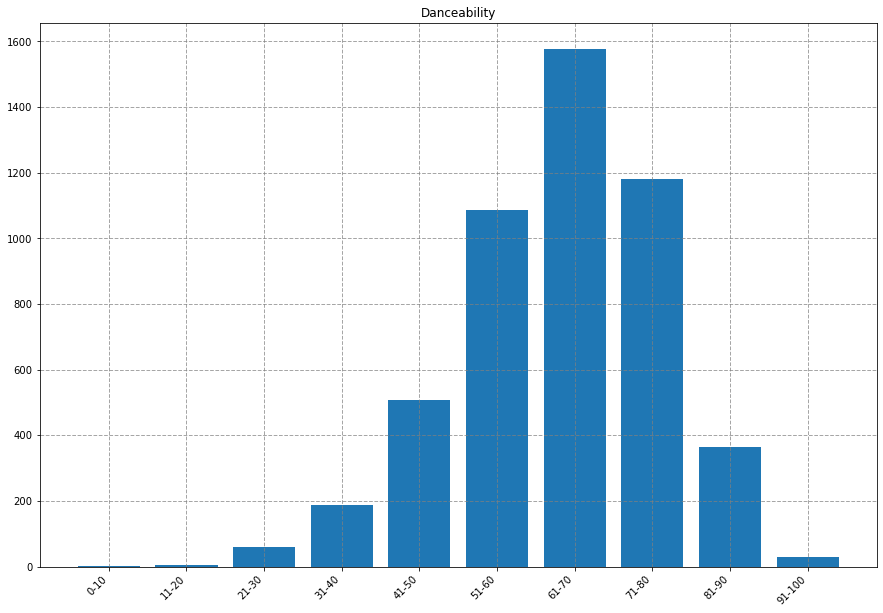

In [540]:
danceability = myutils.format_num(track_data.get_column('danceability'))
energy = myutils.format_num(track_data.get_column('energy'))
loudness = track_data.get_column('loudness')
speechiness = myutils.format_num(track_data.get_column('speechiness'))
tempo = track_data.get_column('tempo')
valence = myutils.format_num(track_data.get_column('valence'))

dance_bins = myutils.bin_vals(danceability)
energy_bins = myutils.bin_vals(energy)
loudness_bins = myutils.bin_loudness(loudness)
speechiness_bins = myutils.bin_vals(speechiness)
tempo_bins = myutils.bin_tempo(tempo)
valence_bins = myutils.bin_vals(valence)

dance_bin_count = [[len(dance_bins[0])],[len(dance_bins[1])],[len(dance_bins[2])],[len(dance_bins[3])],[len(dance_bins[4])],[len(dance_bins[5])],[len(dance_bins[6])],[len(dance_bins[7])],[len(dance_bins[8])],[len(dance_bins[9])]]


x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(dance_bin_count)):
    y_vals.append(dance_bin_count[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "Danceability", "", "")



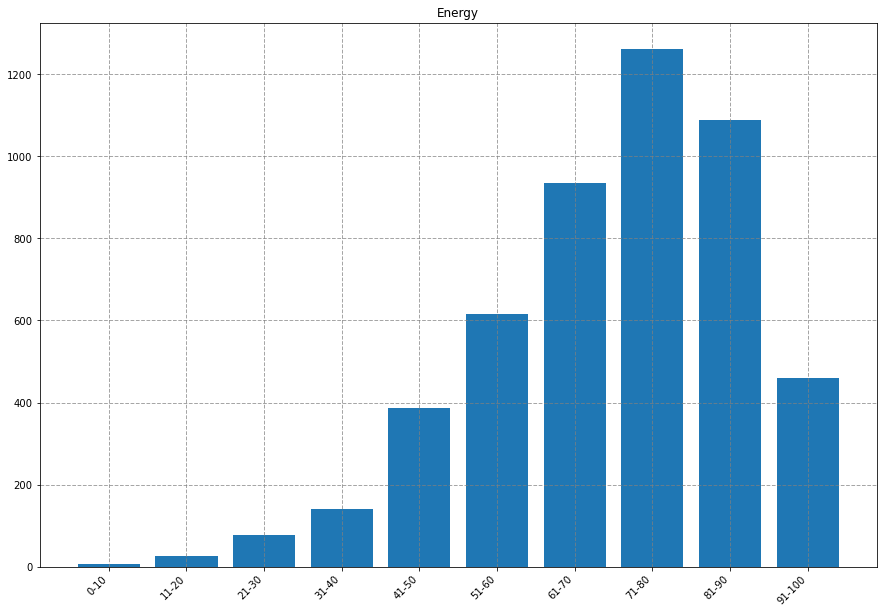

In [541]:
energy_bin_count = [[len(energy_bins[0])],[len(energy_bins[1])],[len(energy_bins[2])],[len(energy_bins[3])],[len(energy_bins[4])],[len(energy_bins[5])],[len(energy_bins[6])],[len(energy_bins[7])],[len(energy_bins[8])],[len(energy_bins[9])]]


x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(energy_bin_count)):
    y_vals.append(energy_bin_count[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "Energy", "", "")

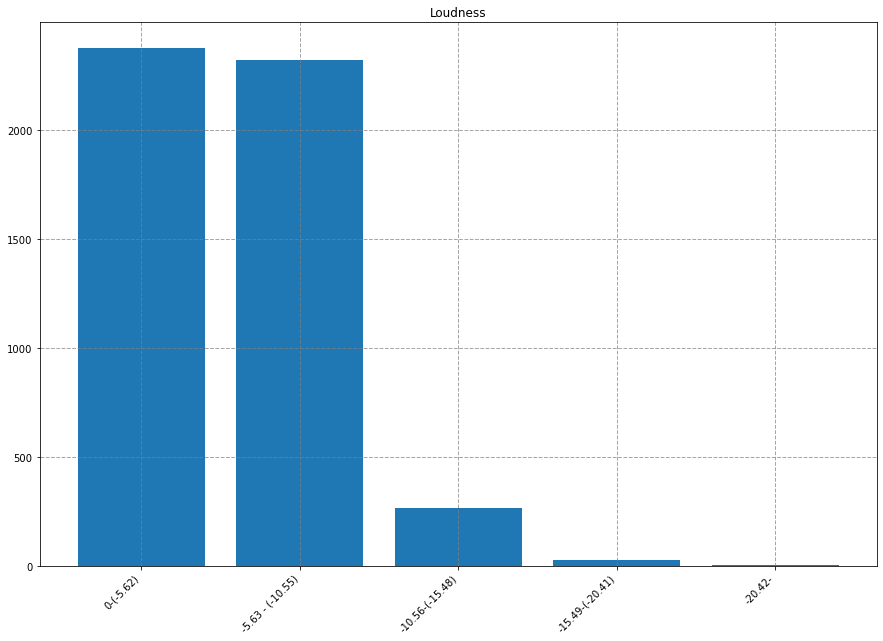

In [542]:
loudness_bin_count = [[len(loudness_bins[0])],[len(loudness_bins[1])],[len(loudness_bins[2])],[len(loudness_bins[3])],[len(loudness_bins[4])]]

x_vals = ['0-(-5.62)','-5.63 - (-10.55)','-10.56-(-15.48)','-15.49-(-20.41)','-20.42-']
y_vals = []
for i in range(len(loudness_bin_count)):
    y_vals.append(loudness_bin_count[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "Loudness", "", "")

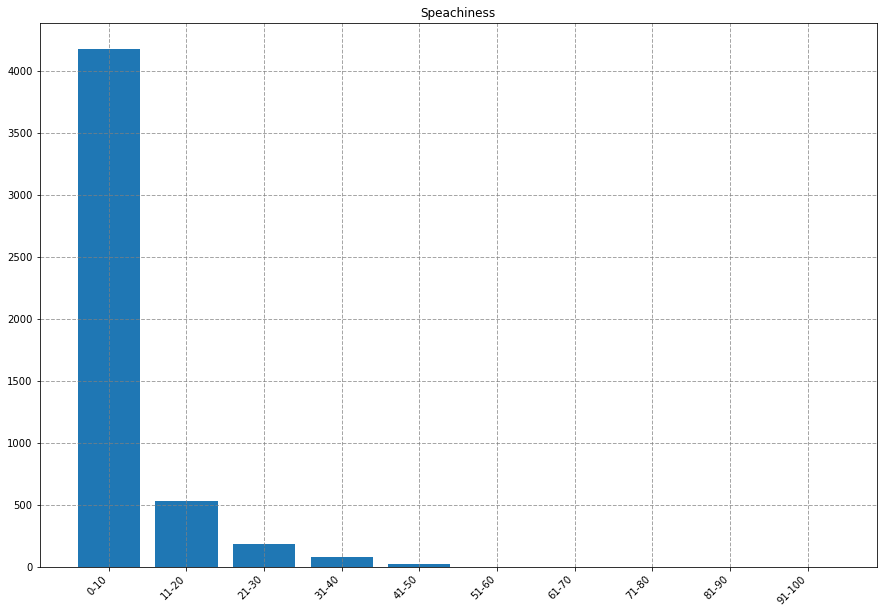

In [543]:
speechiness_bin_count = [[len(speechiness_bins[0])],[len(speechiness_bins[1])],[len(speechiness_bins[2])],[len(speechiness_bins[3])],[len(speechiness_bins[4])],[len(speechiness_bins[5])],[len(speechiness_bins[6])],[len(speechiness_bins[7])],[len(speechiness_bins[8])],[len(speechiness_bins[9])]]

x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(speechiness_bin_count)):
    y_vals.append(speechiness_bin_count[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "Speachiness", "", "")

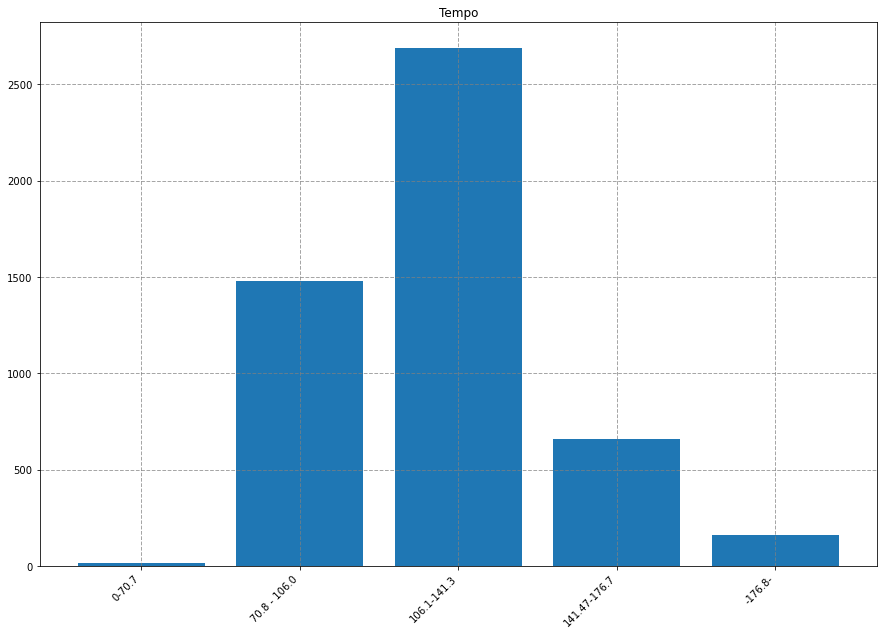

In [544]:
tempo_bin_count = [[len(tempo_bins[0])],[len(tempo_bins[1])],[len(tempo_bins[2])],[len(tempo_bins[3])],[len(tempo_bins[4])]]

x_vals = ['0-70.7','70.8 - 106.0','106.1-141.3','141.47-176.7','-176.8-']
y_vals = []
for i in range(len(tempo_bin_count)):
    y_vals.append(tempo_bin_count[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "Tempo", "", "")

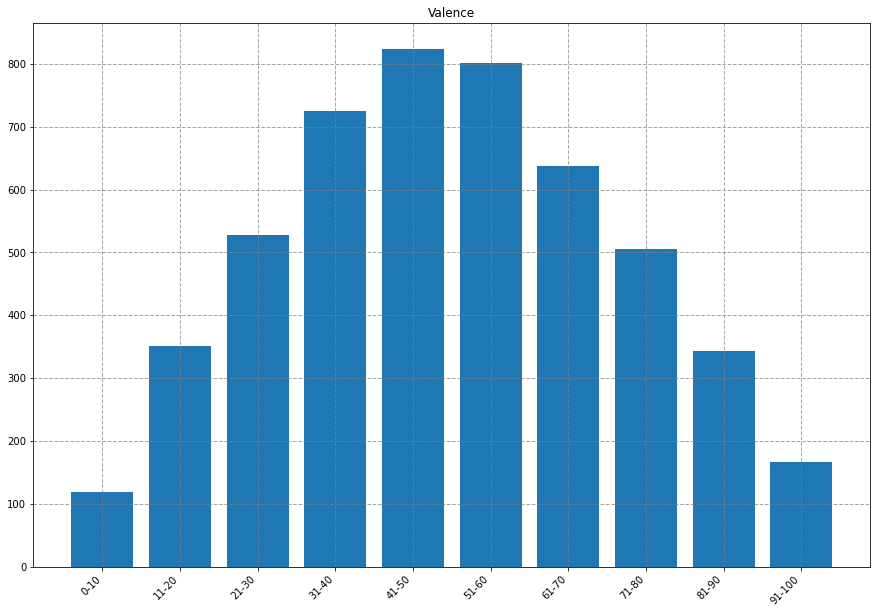

In [545]:
valence_bin_count = [[len(valence_bins[0])],[len(valence_bins[1])],[len(valence_bins[2])],[len(valence_bins[3])],[len(valence_bins[4])],[len(valence_bins[5])],[len(valence_bins[6])],[len(valence_bins[7])],[len(valence_bins[8])],[len(valence_bins[9])]]

x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(valence_bin_count)):
    y_vals.append(valence_bin_count[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "Valence", "", "")

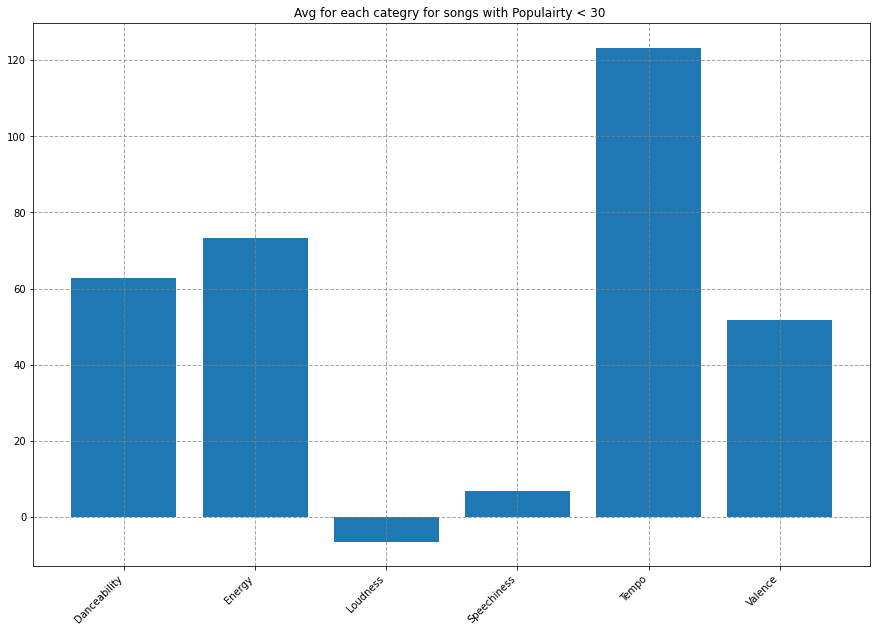

In [551]:
bottom = []
top = []
for row in track_data.data:
    if row[3] < 30:
        bottom.append(row)
    elif row[3] > 70:
        top.append(row)
    else:
        pass

avg_dance = myutils.compute_average(myutils.format_num([row[11] for row in bottom]))
avg_energy = myutils.compute_average(myutils.format_num([row[12] for row in bottom]))
avg_loudness = myutils.compute_average([row[14] for row in bottom])
avg_speech = myutils.compute_average(myutils.format_num([row[16] for row in bottom]))
avg_tempo = myutils.compute_average([row[21] for row in bottom])
avg_valence = myutils.compute_average(myutils.format_num([row[20] for row in bottom]))

x_vals = ['Danceability','Energy','Loudness','Speechiness','Tempo','Valence']
y_vals = [avg_dance, avg_energy, avg_loudness, avg_speech, avg_tempo, avg_valence]


plot_utils.frequency_chart(x_vals, y_vals,  "Avg for each categry for songs with Populairty < 30 ", "", "")



    

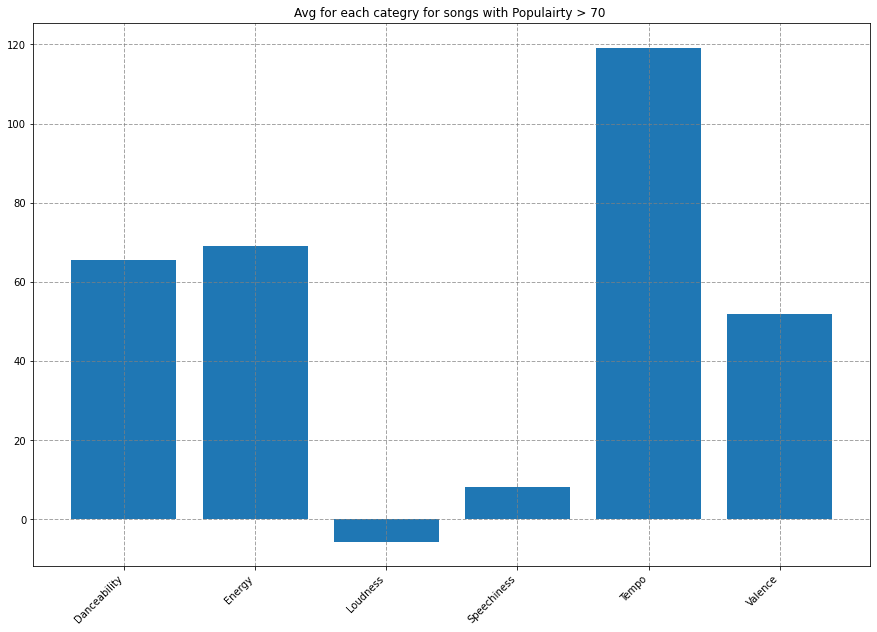

In [552]:
avg_dance = myutils.compute_average(myutils.format_num([row[11] for row in top]))
avg_energy = myutils.compute_average(myutils.format_num([row[12] for row in top]))
avg_loudness = myutils.compute_average([row[14] for row in top])
avg_speech = myutils.compute_average(myutils.format_num([row[16] for row in top]))
avg_tempo = myutils.compute_average([row[21] for row in top])
avg_valence = myutils.compute_average(myutils.format_num([row[20] for row in top]))

x_vals = ['Danceability','Energy','Loudness','Speechiness','Tempo','Valence']
y_vals = [avg_dance, avg_energy, avg_loudness, avg_speech, avg_tempo, avg_valence]


plot_utils.frequency_chart(x_vals, y_vals,  "Avg for each categry for songs with Populairty > 70 ", "", "")

In [548]:
danceability = myutils.format_num(track_data.get_column('danceability'))
energy = myutils.format_num(track_data.get_column('energy'))
loudness = myutils.convert_loudness(track_data.get_column('loudness'))
speechiness = myutils.format_num(track_data.get_column('speechiness'))
tempo = myutils.convert_tempo(track_data.get_column('tempo'))
valence = myutils.format_num(track_data.get_column('valence'))

x_vals = [[danceability[i], energy[i], loudness[i], speechiness[i], tempo[i], valence[i]] for i in range(len(danceability))]
y_vals = myutils.convert_to_rank(track_data.get_column("track_popularity"))


print('Stratified 10-Fold Cross Validation\n')
strat_train_folds, strat_test_folds = myevaluation.stratified_kfold_cross_validation(x_vals, y_vals, 10)
strat_xtrain, strat_ytrain, strat_xtest, strat_ytest = myutils.get_from_folds(x_vals, y_vals, strat_train_folds, strat_test_folds)

myNb = MyNaiveBayesClassifier()
myNb.fit(strat_xtrain, strat_ytrain)

predicted = myNb.predict(strat_xtest)
accuracy = myutils.get_accuracy(strat_ytest, predicted)
print('Nive Bayes:  Accuracy =', round(accuracy * 100, 3), 'Error Rate = ', round((1-accuracy) * 100, 3))

Stratified 10-Fold Cross Validation

Nive Bayes:  Accuracy = 83.94 Error Rate =  16.06


In [549]:
danceability = myutils.format_num(track_data.get_column('danceability'))
energy = myutils.format_num(track_data.get_column('energy'))
loudness = myutils.convert_loudness(track_data.get_column('loudness'))
speechiness = myutils.format_num(track_data.get_column('speechiness'))
tempo = myutils.convert_tempo(track_data.get_column('tempo'))
valence = myutils.format_num(track_data.get_column('valence'))

x_vals = [[danceability[i], energy[i], loudness[i], speechiness[i], tempo[i], valence[i]] for i in range(len(danceability))]
y_vals = myutils.convert_to_rank(track_data.get_column("track_popularity"))

strat_train_folds2, strat_test_folds2 = myevaluation.stratified_kfold_cross_validation(x_vals, y_vals, 10)
strat_xtrain2, strat_ytrain2, strat_xtest2, strat_ytest2 = myutils.get_from_folds(x_vals, y_vals, strat_train_folds2, strat_test_folds2)

my_tree = MyDecisionTreeClassifier()
my_tree.fit(strat_xtrain2, strat_ytrain2)

predicted2 = my_tree.predict(strat_xtest2)
accuracy2 = myutils.get_accuracy(strat_ytest2, predicted2)
print('My Decision Tree: Accuracy =', round(accuracy2 * 100, 3), 'Error Rate = ', round((1-accuracy2) * 100, 3))

My Decision Tree: Accuracy = 23.12 Error Rate =  76.88
